In [4]:
import tensorflow_datasets as tfds

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
train_ds, test_ds = tfds.load("horses_or_humans", split=["train", "test"], as_supervised=True) # not converting data 2 numpy

In [33]:
img, lbl = next(iter(train_ds))

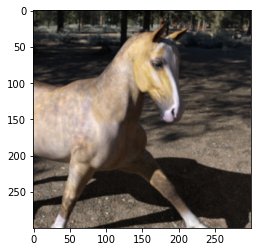

In [35]:
plt.imshow(img)

In [36]:
img.shape

(300, 300, 3)

In [32]:
img.max()

255

In [52]:
imgs = np.array([i for i, _ in train_ds])
lbls = np.array([l for _,l in train_ds])

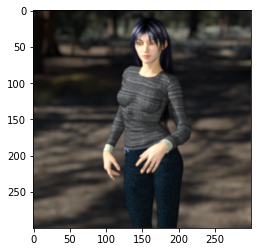

In [65]:
plt.imshow(imgs[8]) 

In [66]:
lbls[8]

1

In [106]:
model_h = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (300,300,3)), 
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,3, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(2),
])
model_h.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 71, 71, 32)        18464     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 39200)            

In [107]:
model_h.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [108]:
model_h.fit(imgs, lbls, epochs = 5) 

Epoch 1/5
33/33 [==============================] - 71s 2s/step - loss: 36.3967 - accuracy: 0.7012
Epoch 2/5
33/33 [==============================] - 70s 2s/step - loss: 0.1156 - accuracy: 0.9568
Epoch 3/5
33/33 [==============================] - 65s 2s/step - loss: 0.0375 - accuracy: 0.9940
Epoch 4/5
33/33 [==============================] - 66s 2s/step - loss: 0.0190 - accuracy: 0.9908
Epoch 5/5
33/33 [==============================] - 64s 2s/step - loss: 0.0018 - accuracy: 0.9997


In [94]:
imgs.shape

(1027, 300, 300, 3)

In [101]:
train_ds

<PrefetchDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>

In [110]:
test_imgs = np.asarray([i for i,l in test_ds])

In [111]:
test_lbls = np.asarray([l for i,l in test_ds])

In [112]:
test_imgs.shape

(256, 300, 300, 3)

In [113]:
model_h.evaluate(test_imgs, test_lbls)

8/8 [==============================] - 5s 567ms/step - loss: 4.9715 - accuracy: 0.7969


[4.971459865570068, 0.796875]